In [1]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

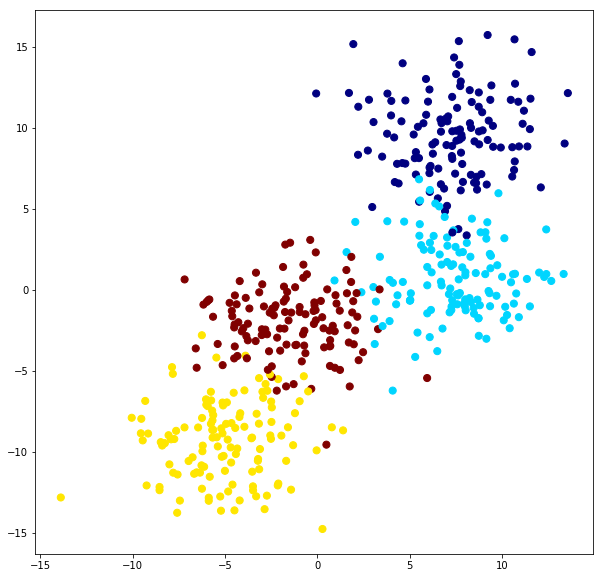

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

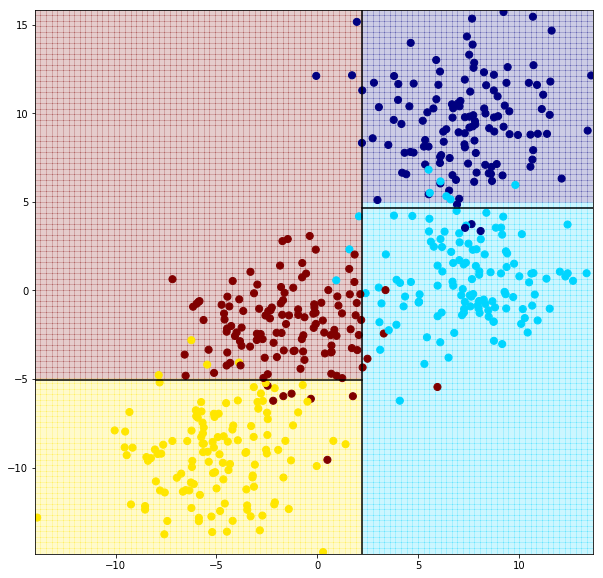

In [9]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

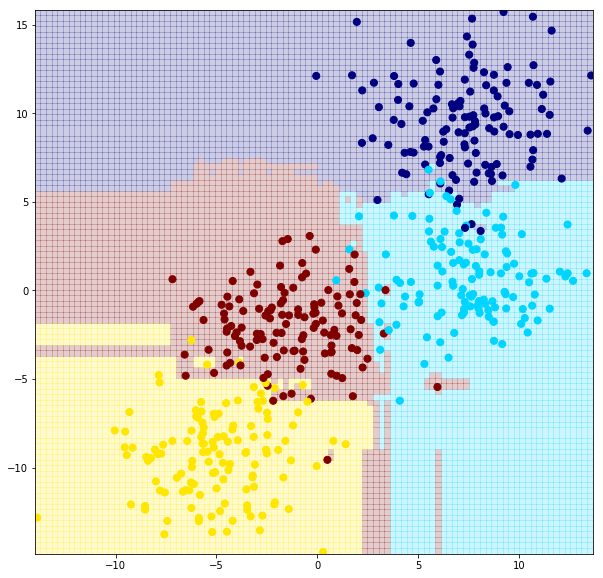

In [10]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

<ErrorbarContainer object of 3 artists>

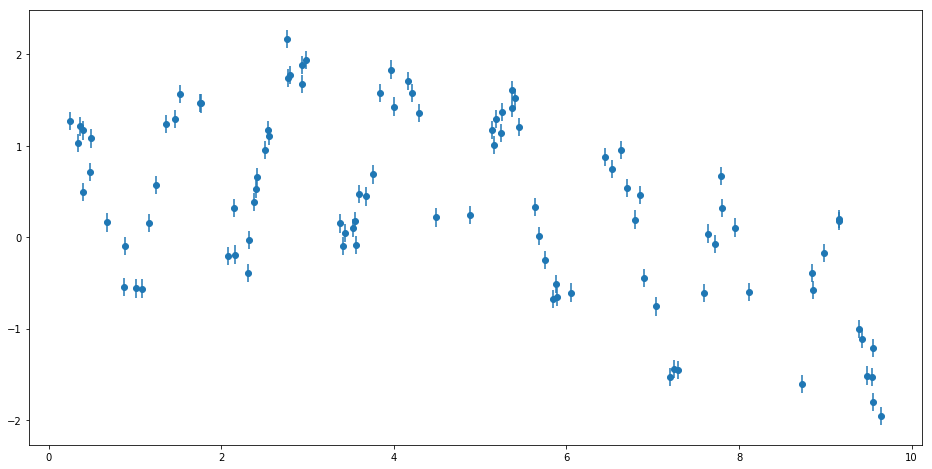

In [11]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    Generate random sinusoidal data for regression analysis. Does SciKit-Learn have this?
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# Call y for data with x
y = sin_model(x)

# Plot x vs y
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

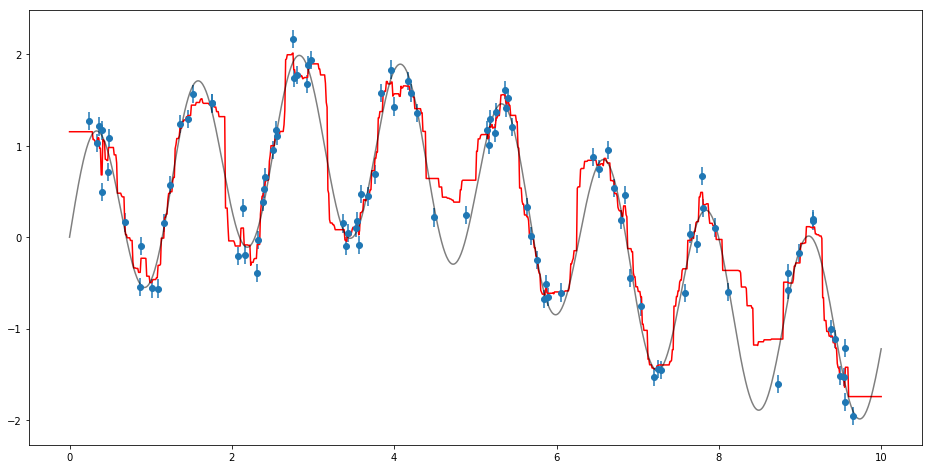

In [12]:
# X points
xfit = np.linspace(0, 10, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);